In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## 0. Load Data

In [2]:
data = pd.read_csv('../data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


## 1. Data Analysis: First Sight

### How is the data distributed?

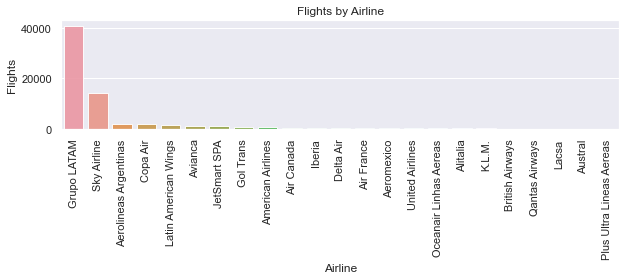

In [3]:
flights_by_airline = data['OPERA'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.barplot(x=flights_by_airline.index, y=flights_by_airline.values, alpha=0.9)
plt.title('Flights by Airline')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.xticks(rotation=90)
plt.show()

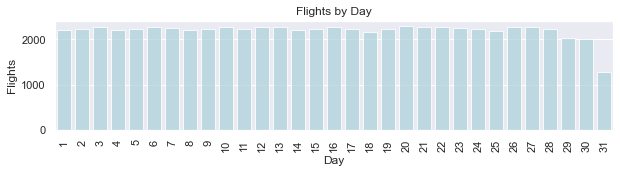

In [4]:
flights_by_day = data['DIA'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style = "darkgrid")
sns.barplot(x=flights_by_day.index, y=flights_by_day.values, color = 'lightblue', alpha=0.8)
plt.title('Flights by Day')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.xticks(rotation=90)
plt.show()

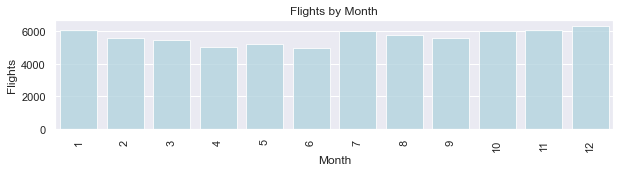

In [5]:
flights_by_month = data['MES'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style = "darkgrid")
sns.barplot(x=flights_by_month.index, y=flights_by_month.values, color = 'lightblue', alpha=0.8)
plt.title('Flights by Month')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=90)
plt.show()

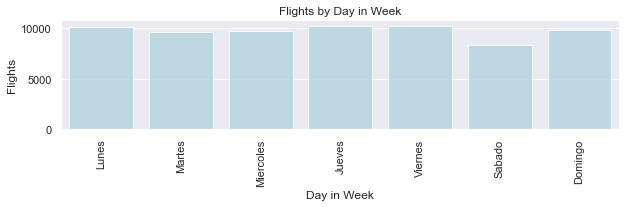

In [6]:
flights_by_day_in_week = data['DIANOM'].value_counts()
days = [
    flights_by_day_in_week.index[2], 
    flights_by_day_in_week.index[5], 
    flights_by_day_in_week.index[4], 
    flights_by_day_in_week.index[1], 
    flights_by_day_in_week.index[0], 
    flights_by_day_in_week.index[6], 
    flights_by_day_in_week.index[3]
]
values_by_day = [
    flights_by_day_in_week.values[2], 
    flights_by_day_in_week.values[5], 
    flights_by_day_in_week.values[4], 
    flights_by_day_in_week.values[1], 
    flights_by_day_in_week.values[0], 
    flights_by_day_in_week.values[6], 
    flights_by_day_in_week.values[3]
]
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.barplot(x=days, y=values_by_day, color = 'lightblue', alpha=0.8)
plt.title('Flights by Day in Week')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Day in Week', fontsize=12)
plt.xticks(rotation=90)
plt.show()

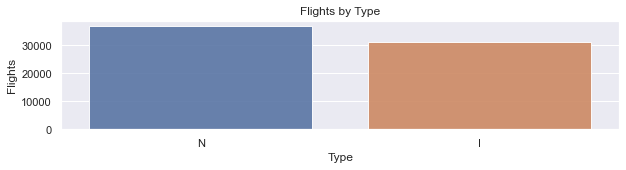

In [7]:
flights_by_type = data['TIPOVUELO'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize = (10, 2))
sns.barplot(x=flights_by_type.index, y=flights_by_type.values, alpha=0.9)
plt.title('Flights by Type')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.show()

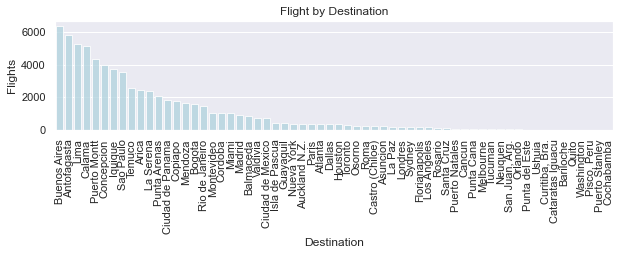

In [8]:
flight_by_destination = data['SIGLADES'].value_counts()
plt.figure(figsize = (10, 2))
sns.set(style="darkgrid")
sns.barplot(x=flight_by_destination.index, y=flight_by_destination.values, color = 'lightblue', alpha=0.8)
plt.title('Flight by Destination')
plt.ylabel('Flights', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=90)

plt.show()

## 2. Features Generation

### 2.a. Period of Day

In [9]:
from datetime import datetime

def get_period_day(date):
    ''' Get date of operated flight
        Return the period of day [mañana, tarde, noche]
    '''
    date_time = datetime.strptime(date, '%Y-%m-%d %H:%M:%S').time()
    morning_min = datetime.strptime("05:00", '%H:%M').time()
    morning_max = datetime.strptime("11:59", '%H:%M').time()
    afternoon_min = datetime.strptime("12:00", '%H:%M').time()
    afternoon_max = datetime.strptime("18:59", '%H:%M').time()
    #night_min = datetime.strptime("19:00", '%H:%M').time()
    #night_max = datetime.strptime("4:59", '%H:%M').time()
    
    if(date_time >= morning_min and date_time <= morning_max):
        return 'mañana'
    elif(date_time >= afternoon_min and date_time <= afternoon_max):
        return 'tarde'
    #elif(date_time >= night_min and date_time <= night_max):
    else:
        return 'noche'

In [10]:
data['period_day'] = data['Fecha-I'].apply(get_period_day)

### 2.b. High Season

In [13]:
from datetime import datetime

def is_high_season(fecha):
    ''' Get date of operated flight
        Return 1 if is high season, 0 otherwise
    '''
    fecha_año = int(fecha.split('-')[0])
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    range1_min = datetime.strptime('15-Dec', '%d-%b').replace(year = fecha_año)
    range1_max = datetime.strptime('3-Mar', '%d-%b').replace(year = fecha_año)
    range2_min = datetime.strptime('15-Jul', '%d-%b').replace(year = fecha_año)
    range2_max = datetime.strptime('31-Jul', '%d-%b').replace(year = fecha_año)
    range3_min = datetime.strptime('11-Sep', '%d-%b').replace(year = fecha_año)
    range3_max = datetime.strptime('30-Sep', '%d-%b').replace(year = fecha_año)
    
    if ((fecha >= range1_min and fecha <= range1_max) or 
        (fecha >= range2_min and fecha <= range2_max) or 
        (fecha >= range3_min and fecha <= range3_max)):
        return 1
    else:
        return 0

In [14]:
data['high_season'] = data['Fecha-I'].apply(is_high_season)

### 2.c. Difference in Minutes

In [15]:
def get_min_diff(data):
    ''' Get flights dataframe
        Return difference in minutes between operated 
        and programmed date
    '''
    fecha_o = datetime.strptime(data['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    fecha_i = datetime.strptime(data['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    min_diff = ((fecha_o - fecha_i).total_seconds())/60
    return min_diff

In [16]:
data['min_diff'] = data.apply(get_min_diff, axis = 1)

### 2.d. Delay

In [17]:
threshold_in_minutes = 15
data['delay'] = np.where(data['min_diff'] > threshold_in_minutes, 1, 0)

## 3. Data Analysis: Second Sight

### How is the delay rate across columns?

In [18]:
def get_rate_from_column(data, column):
    ''' Get flights dataframe and column
        Return dataframe with each different column value
        and its respective delay rate
    '''

    data_delayed = data.loc[data['delay'] == 1]
    delays = dict(data_delayed[column].value_counts())
    total = data[column].value_counts().to_dict()

    rates = {}
    for name, total in total.items():
        if name in delays:
            rates[name] = round(delays[name]/total, 2)*100
        else:
            rates[name] = 0
    return pd.DataFrame.from_dict(data = rates, orient = 'index', columns = ['Tasa (%)'])


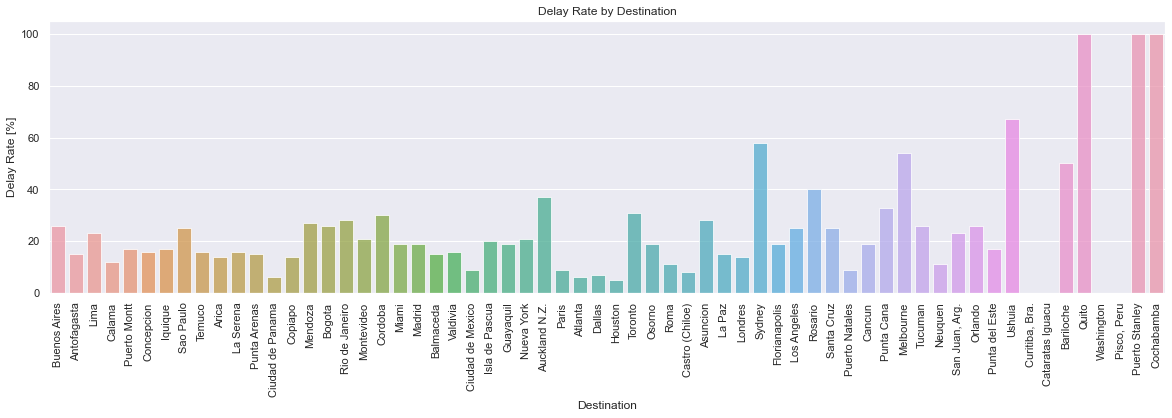

In [19]:
destination_rate = get_rate_from_column(data, 'SIGLADES')
destination_rate_values = data['SIGLADES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=destination_rate_values, y=destination_rate['Tasa (%)'], alpha = 0.75)
plt.title('Delay Rate by Destination')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Destination', fontsize=12)
plt.xticks(rotation=90)
plt.show()


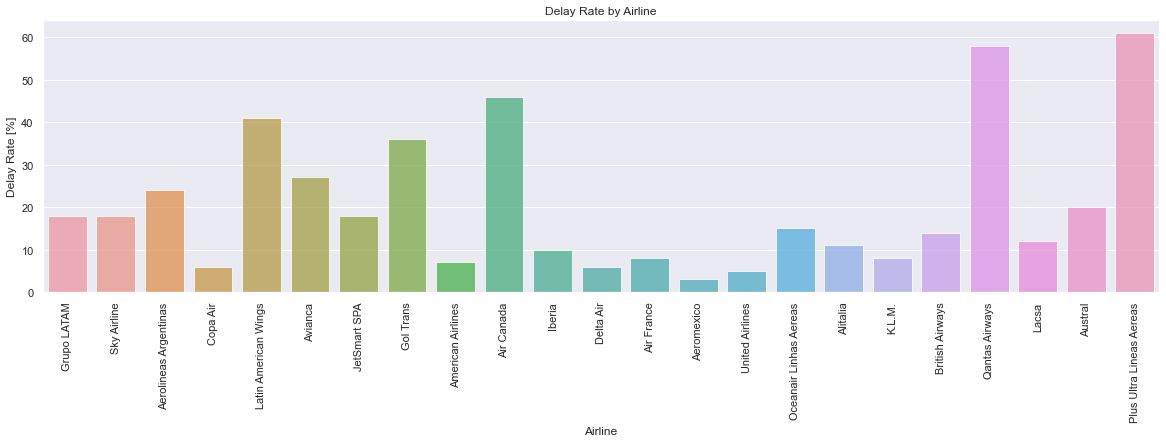

In [20]:
airlines_rate = get_rate_from_column(data, 'OPERA')
airlines_rate_values = data['OPERA'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=airlines_rate_values, y=airlines_rate['Tasa (%)'], alpha = 0.75)
plt.title('Delay Rate by Airline')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.xticks(rotation=90)
plt.show()

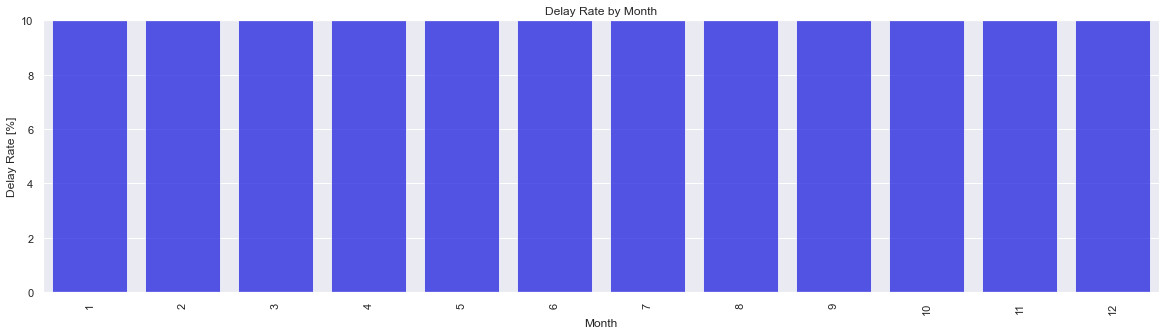

In [21]:
month_rate = get_rate_from_column(data, 'MES')
month_rate_value = data['MES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=month_rate_value, y=month_rate['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Delay Rate by Month')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,10)
plt.show()

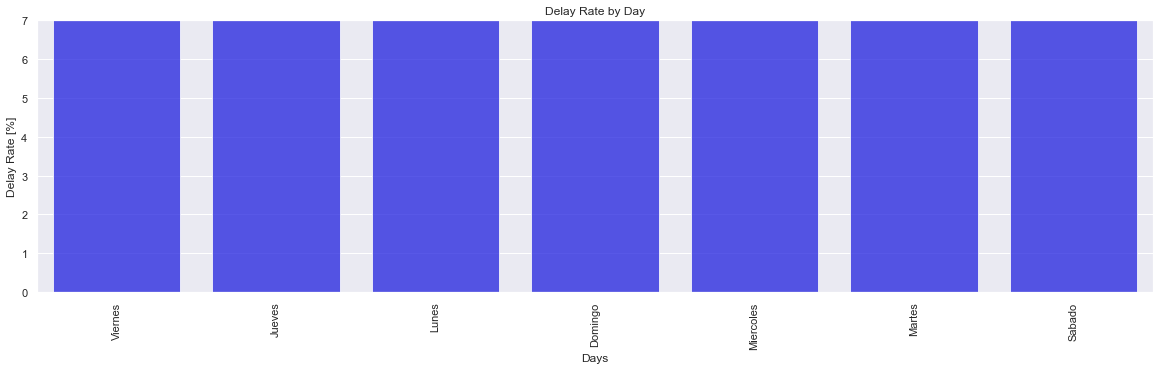

In [22]:
days_rate = get_rate_from_column(data, 'DIANOM')
days_rate_value = data['DIANOM'].value_counts().index

sns.set(style="darkgrid")
plt.figure(figsize = (20, 5))
sns.barplot(x=days_rate_value, y=days_rate['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Delay Rate by Day')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Days', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,7)
plt.show()

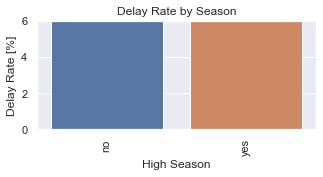

In [23]:
high_season_rate = get_rate_from_column(data, 'high_season')
high_season_rate_values = data['high_season'].value_counts().index

plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(x=["no", "yes"], y=high_season_rate['Tasa (%)'])
plt.title('Delay Rate by Season')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('High Season', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,6)
plt.show()

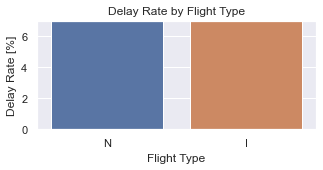

In [24]:
flight_type_rate = get_rate_from_column(data, 'TIPOVUELO')
flight_type_rate_values = data['TIPOVUELO'].value_counts().index
plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(x=flight_type_rate_values, y=flight_type_rate['Tasa (%)'])
plt.title('Delay Rate by Flight Type')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Flight Type', fontsize=12)
plt.ylim(0,7)
plt.show()

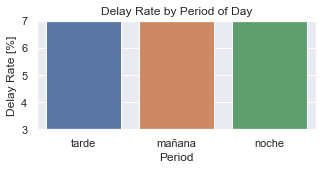

In [25]:
period_day_rate = get_rate_from_column(data, 'period_day')
period_day_rate_values = data['period_day'].value_counts().index
plt.figure(figsize = (5, 2))
sns.set(style="darkgrid")
sns.barplot(x=period_day_rate_values, y=period_day_rate['Tasa (%)'])
plt.title('Delay Rate by Period of Day')
plt.ylabel('Delay Rate [%]', fontsize=12)
plt.xlabel('Period', fontsize=12)
plt.ylim(3,7)
plt.show()

## 4. Training

### 4.a. Data Split (Training and Validation)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
features = pd.concat([
    pd.get_dummies(data['OPERA'], prefix = 'OPERA'),
    pd.get_dummies(data['TIPOVUELO'], prefix = 'TIPOVUELO'), 
    pd.get_dummies(data['MES'], prefix = 'MES')], 
    axis = 1
)
target = data['delay']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.33, random_state = 42)

In [29]:
print(f"train shape: {x_train.shape} | test shape: {x_test.shape}")

train shape: (45698, 37) | test shape: (22508, 37)


In [30]:
y_train.value_counts('%')*100

0    81.618452
1    18.381548
Name: delay, dtype: float64

In [31]:
y_test.value_counts('%')*100

0    81.277768
1    18.722232
Name: delay, dtype: float64

### 4.b. Model Selection

#### 4.b.i. XGBoost

In [1]:
import xgboost as xgb
from xgboost import plot_importance

In [33]:
xgb_model = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model.fit(x_train, y_train)

[18:43:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
xgboost_y_preds = xgb_model.predict(x_test)
xgboost_y_preds = [1 if y_pred > 0.5 else 0 for y_pred in xgboost_y_preds]

In [35]:
confusion_matrix(y_test, xgboost_y_preds)

array([[18257,    37],
       [ 4121,    93]], dtype=int64)

In [36]:
classification_report(y_test, xgboost_y_preds)

'              precision    recall  f1-score   support\n\n           0       0.82      1.00      0.90     18294\n           1       0.72      0.02      0.04      4214\n\n    accuracy                           0.82     22508\n   macro avg       0.77      0.51      0.47     22508\nweighted avg       0.80      0.82      0.74     22508\n'

#### 4.b.ii. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
reg_model = LogisticRegression()
reg_model.fit(x_train, y_train)

LogisticRegression()

In [39]:
reg_y_preds = reg_model.predict(x_test)

In [40]:
confusion_matrix(y_test, reg_y_preds)

array([[18193,   101],
       [ 4086,   128]], dtype=int64)

In [41]:
classification_report(y_test, reg_y_preds)

'              precision    recall  f1-score   support\n\n           0       0.82      0.99      0.90     18294\n           1       0.56      0.03      0.06      4214\n\n    accuracy                           0.81     22508\n   macro avg       0.69      0.51      0.48     22508\nweighted avg       0.77      0.81      0.74     22508\n'

## 5. Data Analysis: Third Sight

### Feature Importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 720x360 with 0 Axes>

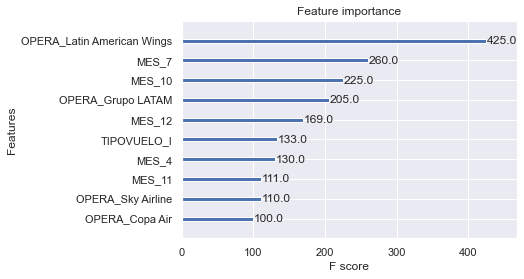

In [42]:
plt.figure(figsize = (10,5))
plot_importance(xgb_model, max_num_features=10)

In [43]:
top_10_features = [
    "OPERA_Latin American Wings", 
    "MES_7",
    "MES_10",
    "OPERA_Grupo LATAM",
    "MES_12",
    "TIPOVUELO_I",
    "MES_4",
    "MES_11",
    "OPERA_Sky Airline",
    "OPERA_Copa Air"
]

### Data Balance

In [44]:
n_y0 = len(y_train[y_train == 0])
n_y1 = len(y_train[y_train == 1])
scale = n_y0/n_y1
print(scale)

4.4402380952380955


## 6. Training with Improvement

### 6.a. Data Split

In [45]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(features[top_10_features], target, test_size = 0.33, random_state = 42)

### 6.b. Model Selection

#### 6.b.i. XGBoost with Feature Importance and with Balance

In [46]:
xgb_model_2 = xgb.XGBClassifier(random_state=1, learning_rate=0.01, scale_pos_weight = scale, max_depth=5, min_child_weight=1)
xgb_model_2.fit(x_train2, y_train2)

[18:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=4.4402380952380955,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [47]:
xgboost_y_preds_2 = xgb_model_2.predict(x_test2)

In [48]:
confusion_matrix(y_test2, xgboost_y_preds_2)

array([[8948, 9346],
       [1197, 3017]], dtype=int64)

In [49]:
print(classification_report(y_test2, xgboost_y_preds_2))

              precision    recall  f1-score   support

           0       0.88      0.49      0.63     18294
           1       0.24      0.72      0.36      4214

    accuracy                           0.53     22508
   macro avg       0.56      0.60      0.50     22508
weighted avg       0.76      0.53      0.58     22508



#### 6.b.ii. XGBoost with Feature Importance but without Balance

In [50]:
xgb_model_3 = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
xgb_model_3.fit(x_train2, y_train2)

[18:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
xgboost_y_preds_3 = xgb_model_3.predict(x_test2)

In [52]:
confusion_matrix(y_test2, xgboost_y_preds_3)

array([[18282,    12],
       [ 4184,    30]], dtype=int64)

In [53]:
print(classification_report(y_test2, xgboost_y_preds_3))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.71      0.01      0.01      4214

    accuracy                           0.81     22508
   macro avg       0.76      0.50      0.46     22508
weighted avg       0.80      0.81      0.73     22508



#### 6.b.iii. Logistic Regression with Feature Importante and with Balance

In [54]:
reg_model_2 = LogisticRegression(class_weight={1: n_y0/len(y_train), 0: n_y1/len(y_train)})
reg_model_2.fit(x_train2, y_train2)

LogisticRegression(class_weight={0: 0.18381548426626987, 1: 0.8161845157337302})

In [55]:
reg_y_preds_2 = reg_model_2.predict(x_test2)

In [56]:
confusion_matrix(y_test2, reg_y_preds_2)

array([[9487, 8807],
       [1314, 2900]], dtype=int64)

In [57]:
print(classification_report(y_test2, reg_y_preds_2))

              precision    recall  f1-score   support

           0       0.88      0.52      0.65     18294
           1       0.25      0.69      0.36      4214

    accuracy                           0.55     22508
   macro avg       0.56      0.60      0.51     22508
weighted avg       0.76      0.55      0.60     22508



#### 6.b.iv. Logistic Regression with Feature Importante but without Balance

In [58]:
reg_model_3 = LogisticRegression()
reg_model_3.fit(x_train2, y_train2)

LogisticRegression()

In [59]:
reg_y_preds_3 = reg_model_3.predict(x_test2)

In [60]:
confusion_matrix(y_test2, reg_y_preds_3)

array([[18246,    48],
       [ 4160,    54]], dtype=int64)

In [61]:
print(classification_report(y_test2, reg_y_preds_3))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     18294
           1       0.53      0.01      0.03      4214

    accuracy                           0.81     22508
   macro avg       0.67      0.51      0.46     22508
weighted avg       0.76      0.81      0.73     22508



## 7. Data Science Conclusions

By looking at the results of the 6 trained models, it can be determined:
- There is no noticeable difference in results between XGBoost and LogisticRegression.
- Does not decrease the performance of the model by reducing the features to the 10 most important.
- Improves the model's performance when balancing classes, since it increases the recall of class "1".

**With this, the model to be productive must be the one that is trained with the top 10 features and class balancing, but which one?**